In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings 
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
warnings.simplefilter('ignore')

In [84]:
df = pd.read_csv('CCTV_in_Seoul.csv', encoding='utf-8',index_col = '기관명')
df

소계  2013년도 이전  2014년  2015년  2016년
기관명                                       
강남구   2780       1292    430    584    932
강동구    773        379     99    155    377
강북구    748        369    120    138    204
강서구    884        388    258    184     81
관악구   1496        846    260    390    613
광진구    707        573     78     53    174
구로구   1561       1142    173    246    323
금천구   1015        674     51    269    354
노원구   1265        542     57    451    516
도봉구    485        238    159     42    386
동대문구  1294       1070     23    198    579
동작구   1091        544    341    103    314
마포구    574        314    118    169    379
서대문구   962        844     50     68    292
서초구   1930       1406    157    336    398
성동구   1062        730     91    241    265
성북구   1464       1009     78    360    204
송파구    618        529     21     68    463
양천구   2034       1843    142     30    467
영등포구   904        495    214    195    373
용산구   1624       1368    218    112    398
은평구   1873       1138    224    278    468
종로구   1002        464    314    211    630
중구     671        413    190     72    348
중랑구    660        509    121    177    109

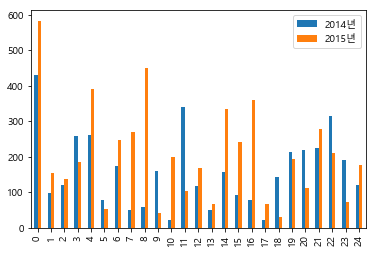

In [15]:
df[['2014년', '2015년']].plot(kind = 'bar')
plt.show()

In [19]:
df.sort_values (by ='소계',ascending = False)[:5][['2014년']]
df['CCTV 총설치수'] = df['소계']
df

기관명    소계  2013년도 이전  2014년  2015년  2016년  CCTV 총설치수
0    강남구  2780       1292    430    584    932       2780
1    강동구   773        379     99    155    377        773
2    강북구   748        369    120    138    204        748
3    강서구   884        388    258    184     81        884
4    관악구  1496        846    260    390    613       1496
5    광진구   707        573     78     53    174        707
6    구로구  1561       1142    173    246    323       1561
7    금천구  1015        674     51    269    354       1015
8    노원구  1265        542     57    451    516       1265
9    도봉구   485        238    159     42    386        485
10  동대문구  1294       1070     23    198    579       1294
11   동작구  1091        544    341    103    314       1091
12   마포구   574        314    118    169    379        574
13  서대문구   962        844     50     68    292        962
14   서초구  1930       1406    157    336    398       1930
15   성동구  1062        730     91    241    265       1062
16   성북구  1464       1009     78    360    204       1464
17   송파구   618        529     21     68    463        618
18   양천구  2034       1843    142     30    467       2034
19  영등포구   904        495    214    195    373        904
20   용산구  1624       1368    218    112    398       1624
21   은평구  1873       1138    224    278    468       1873
22   종로구  1002        464    314    211    630       1002
23    중구   671        413    190     72    348        671
24   중랑구   660        509    121    177    109        660

In [27]:
cctv = df.iloc[0:]
cctv['설치정도'] = cctv['소계'].apply(lambda v: '많음' if v>1000 else '적음')
cctv

기관명    소계  2013년도 이전  2014년  2015년  2016년 설치정도
0    강남구  2780       1292    430    584    932   많음
1    강동구   773        379     99    155    377   적음
2    강북구   748        369    120    138    204   적음
3    강서구   884        388    258    184     81   적음
4    관악구  1496        846    260    390    613   많음
5    광진구   707        573     78     53    174   적음
6    구로구  1561       1142    173    246    323   많음
7    금천구  1015        674     51    269    354   많음
8    노원구  1265        542     57    451    516   많음
9    도봉구   485        238    159     42    386   적음
10  동대문구  1294       1070     23    198    579   많음
11   동작구  1091        544    341    103    314   많음
12   마포구   574        314    118    169    379   적음
13  서대문구   962        844     50     68    292   적음
14   서초구  1930       1406    157    336    398   많음
15   성동구  1062        730     91    241    265   많음
16   성북구  1464       1009     78    360    204   많음
17   송파구   618        529     21     68    463   적음
18   양천구  2034       1843    142     30    467   많음
19  영등포구   904        495    214    195    373   적음
20   용산구  1624       1368    218    112    398   많음
21   은평구  1873       1138    224    278    468   많음
22   종로구  1002        464    314    211    630   많음
23    중구   671        413    190     72    348   적음
24   중랑구   660        509    121    177    109   적음

In [33]:
df['2016년'].max()

932

In [38]:
df.sort_values (by ='2016년',ascending = False)[:1][['2014년','2015년','2016년']]

2014년  2015년  2016년
기관명                     
강남구    430    584    932

In [61]:
def fn(v) :
    if v>=1.2:
        return '급증'
    elif v>1:
        return '보통'
    else :
        return '낮음'
    

In [81]:
#df['2013년 증가율']= df[('2014년')].apply(fn)
#df['2016년 증가율']= df[('2016년')].apply(fn)

df1= df[('2014년')] / df[('2013년도 이전')]
df2 = df[('2016년')] / df[('2015년')]
df['2013년 증가율']= df1.apply(fn)
df['2016년 증가율']= df2.apply(fn)
df

소계  2013년도 이전  2014년  2015년  2016년 2013년 증가율 2016년 증가율
기관명                                                           
강남구   2780       1292    430    584    932        낮음        급증
강동구    773        379     99    155    377        낮음        급증
강북구    748        369    120    138    204        낮음        급증
강서구    884        388    258    184     81        낮음        낮음
관악구   1496        846    260    390    613        낮음        급증
광진구    707        573     78     53    174        낮음        급증
구로구   1561       1142    173    246    323        낮음        급증
금천구   1015        674     51    269    354        낮음        급증
노원구   1265        542     57    451    516        낮음        보통
도봉구    485        238    159     42    386        낮음        급증
동대문구  1294       1070     23    198    579        낮음        급증
동작구   1091        544    341    103    314        낮음        급증
마포구    574        314    118    169    379        낮음        급증
서대문구   962        844     50     68    292        낮음        급증
서초구   1930       1406    157    336    398        낮음        보통
성동구   1062        730     91    241    265        낮음        보통
성북구   1464       1009     78    360    204        낮음        낮음
송파구    618        529     21     68    463        낮음        급증
양천구   2034       1843    142     30    467        낮음        급증
영등포구   904        495    214    195    373        낮음        급증
용산구   1624       1368    218    112    398        낮음        급증
은평구   1873       1138    224    278    468        낮음        급증
종로구   1002        464    314    211    630        낮음        급증
중구     671        413    190     72    348        낮음        급증
중랑구    660        509    121    177    109        낮음        낮음

In [85]:
df['2015년 증가율']= df[('2015년')] / df[('2014년')]
df['2016년 증가율']= df[('2016년')] / df[('2015년')]

df

소계  2013년도 이전  2014년  2015년  2016년  2015년 증가율  2016년 증가율
기관명                                                             
강남구   2780       1292    430    584    932   1.358140   1.595890
강동구    773        379     99    155    377   1.565657   2.432258
강북구    748        369    120    138    204   1.150000   1.478261
강서구    884        388    258    184     81   0.713178   0.440217
관악구   1496        846    260    390    613   1.500000   1.571795
광진구    707        573     78     53    174   0.679487   3.283019
구로구   1561       1142    173    246    323   1.421965   1.313008
금천구   1015        674     51    269    354   5.274510   1.315985
노원구   1265        542     57    451    516   7.912281   1.144124
도봉구    485        238    159     42    386   0.264151   9.190476
동대문구  1294       1070     23    198    579   8.608696   2.924242
동작구   1091        544    341    103    314   0.302053   3.048544
마포구    574        314    118    169    379   1.432203   2.242604
서대문구   962        844     50     68    292   1.360000   4.294118
서초구   1930       1406    157    336    398   2.140127   1.184524
성동구   1062        730     91    241    265   2.648352   1.099585
성북구   1464       1009     78    360    204   4.615385   0.566667
송파구    618        529     21     68    463   3.238095   6.808824
양천구   2034       1843    142     30    467   0.211268  15.566667
영등포구   904        495    214    195    373   0.911215   1.912821
용산구   1624       1368    218    112    398   0.513761   3.553571
은평구   1873       1138    224    278    468   1.241071   1.683453
종로구   1002        464    314    211    630   0.671975   2.985782
중구     671        413    190     72    348   0.378947   4.833333
중랑구    660        509    121    177    109   1.462810   0.615819